В переменной df находится датафрэйм. Ваша задача положить в переменную  df_shape строку с информацией сколько линий и столбцов он имеет в следующем виде:

'df has y rows and x columns'
где y – число строк, а x – число колонок.

In [ ]:
df_shape = "df has {y} rows and {x} columns".format(y=df.shape[0], x=df.shape[1])


Положите в переменную na_number серию, в которой для каждой колонки указано сколько ячеек содержат пропущенные значения. Например, для такого датафрэйма:
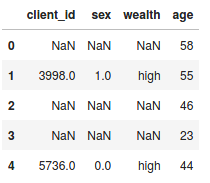
Note: датафрейм уже лежит в переменной df

In [ ]:
na_number = df.isna().sum()


Сохраните в переменную df_types типы данных каждой колонки датафрэйма df.



In [ ]:
df_types = df.dtypes


Внезапно оказалось, что в переменной age значения хранятся в виде строк! Поменяйте тип значений на целочисленный в этой колонке датафрэйма df.



In [ ]:
df.age = df.age.astype('int')


Как выяснилось, для дальнейшего анализа нам не понадобятся колонки sex и age – удалите их из датафрэйма.



In [ ]:
df = df.drop(columns = ['sex','age'])


А теперь проверим, есть ли в нашей таблице df дубликаты по полю client_id – дропните все строки, в которых значения в колонке client_id повторяются.



In [ ]:
df = df.drop_duplicates(subset='client_id')


Небольшой перерыв на чистый питон. В списке numbers содержатся числа. Добавьте через цикл в список positive_numbers положительные числа из numbers. При этом, если вам попался 0, то нужно прекратить этот цикл.

Например,

numbers = [1, -2, 3, 0, -3, 2]
Тогда positive_numbers должен быть

positive_numbers = [1, 3]

In [ ]:
positive_numbers = []
for number in numbers:
    if number > 0:
        positive_numbers.append(number)
    elif number < 0:
        continue
    else:
        break

Продолжим анализ данных по поездкам. В предыдущем уроке вы изучили распределения оценок водителей и клиентов. Теперь посмотрим на колонки со временем!

Сохраните данные, находящиеся по ссылке, в переменную taxi, разделитель – ;. Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type) .

Полезная ссылка:

pd.to_datetime()

In [ ]:
taxi = pd.read_csv('https://stepik.org/media/attachments/lesson/362441/taxi_peru.csv',sep = ';')
taxi[['start_at','end_at','arrived_at']] = taxi[['start_at','end_at','arrived_at']].apply(pd.to_datetime)
taxi = taxi.query('start_type == "asap" or start_type == "reserved"')

⭐️Задание со звёздочкой!⭐️

Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах. Чтобы сконвертировать полученный результат в минуты, можно использовать метод  .astype('timedelta64[m]').

Полезная ссылка: 

Подробнее об astype
Подсказки

Данные загружены в taxi и отфильтрованы, как в 9 шаге.

In [ ]:
taxi['wait_time'] = (taxi.arrived_at - taxi.start_at).astype('timedelta64[m]')


⭐️Задание со звёздочкой!⭐️

Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.

Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз

In [ ]:
taxi.query('start_type == "reserved" and wait_time >0') \
    .groupby('driver_id') \
    .agg({'user_id':'count'}) \
    .rename(columns = {'user_id':'late_number'}) \
    .idxmax()

In [ ]:
# ИЛИ
taxi.query('start_type == "reserved" and wait_time >0') \
    driver_id \
    .value_counts() \
    .idxmax()

⭐️Задание со звёздочкой!⭐️

Добавьте столбец month, где будет храниться месяц, в котором был сделан заказ (start_at), как номер, и столбец weekday – название дня недели. 

Полезные ссылки:

как извлечь нужное значение из даты?
.dt.strftime('%A') – извлечь день недели в формате названия (подробнее о strftime здесь)
Подсказки

Данные загружены в taxi и отфильтрованы, как в 9 шаге.

In [ ]:
taxi['month'] = taxi.start_at.dt.month
taxi['weekday'] = taxi.start_at.dt.strftime('%A')

⭐️Задание со звёздочкой!⭐️

Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина. 

Вопрос: в каком летнем месяце было сделано наименьшее число заказов? В качестве ответа введите номер месяца (6, 7 или 8). 

In [ ]:
sns.countplot(taxi.month)
sns.despine() # убирает раску на графике

⭐️Задание со звёздочкой!⭐️

А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке. Например: 

sns.countplot(data['column'], order=['One', 'Two', 'Three'])
Вопрос: в какой день недели суммарно поступило меньше всего заказов?

In [ ]:
sns.countplot(taxi.weekday,
             order = ['Monday', 'Tuesday','Wednesday', 'Thursday','Friday','Saturday','Sunday'])
sns.despine() 

In [ ]:
# с кастомизацией
sns.countplot(data = taxi,
             order = ['Monday', 'Tuesday','Wednesday', 'Thursday','Friday','Saturday','Sunday'],
             hue = 'start_type',
             palette = ['#01edff','#10cc95'])
sns.despine() 

⭐️Задание со звёздочкой!⭐️

Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:

DAU (daily active users) – число уникальных пользователей за день
WAU (weekly active users) – число уникальных пользователей за неделю
MAU (monthly active users) – число уникальных пользователей за месяц
Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени. Постройте график MAU и выберите верные утверждения. 

Могут пригодиться:

groupby – группировка
nunique – число уникальных значений
plot.line – линейная диаграмма

In [ ]:
mau = taxi.groupby('month') \
    .agg({'user_id': pd.Series.nunique})

<b><br> Дополнительный проект </b><br>
А сейчас ещё небольшой минипроект на фильтрацию данных)

У вас есть таблица с записями о компаниях, включая их ИНН, а также есть текстовый файл с набором ИНН (колонка head_inn), которые хранятся в папке 4_inn

inn.xls - таблица в экселевском формате
necessary_inn.txt - перечень необходимых ИНН в текстовом формате
<b><br> Задачи </b><br>
извлечь из таблицы записи с ИНН, указанными в текстовом файле
записать результат в файл selected_inn.csv

In [24]:
path = '/home/jupyter-i.tsukanov-7/shared/homeworks/python_ds_miniprojects/4_inn/'

In [27]:
import pandas as pd
import os 

In [28]:
os.listdir(path)

['inn.xls', 'necessary_inn.txt']

In [36]:
inn = pd.read_excel('https://stepik.org/media/attachments/course/72204/inn.xls', index_col = 0)

In [37]:
necessary_inns = []
with open(path + 'necessary_inn.txt') as f:
    for line in f:
        necessary_inns.append(line.strip())

In [39]:
inn.head_inn = inn.head_inn.astype(str)

In [42]:
selected_inns = inn.query('head_inn in @necessary_inns')

In [44]:
selected_inns['income,RUB'].sum()

6104522627393